In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,mean_absolute_percentage_error
from math import sqrt
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import SimpleRNN, Dense,BatchNormalization,Dropout
from tensorflow.keras.layers import Bidirectional,LSTM, Dense
from tensorflow.keras.layers import GRU,Dense
from keras.callbacks import EarlyStopping
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
data=pd.read_csv("C:/Users/kumar/Desktop/pr_dataset/madhya_pradesh.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 6 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Date                                              1371 non-null   object
 1   No. of Facilitator Registered                     1371 non-null   int64 
 2   No. of Sabha Scheduled                            1371 non-null   int64 
 3   No. of Facilitator Feedback Submitted             1371 non-null   int64 
 4   No. of Panchayats with Sabha Images               1371 non-null   int64 
 5   No. of Panchayats with Public Information Images  1371 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 64.4+ KB


In [4]:
print(data)

            Date  No. of Facilitator Registered  No. of Sabha Scheduled  \
0     01-09-2020                              0                       0   
1     02-09-2020                              0                       0   
2     03-09-2020                              0                       0   
3     04-09-2020                              0                       0   
4     05-09-2020                              0                       0   
...          ...                            ...                     ...   
1366  29-05-2024                          28813                   49036   
1367  30-05-2024                          28819                   49036   
1368  31-05-2024                          28819                   49036   
1369  01-06-2024                          28819                   49036   
1370  02-06-2024                          28819                   49036   

      No. of Facilitator Feedback Submitted  \
0                                         0   
1    

<Axes: xlabel='Date', ylabel='Values'>

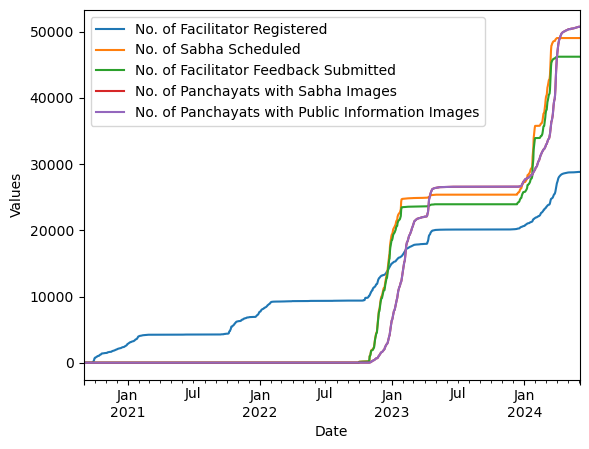

In [5]:
data['Date']=pd.to_datetime(data['Date'],format="%d-%m-%Y")
data.set_index('Date', inplace=True)
data.plot(ylabel='Values')

In [6]:
df=data.resample('H').interpolate(method='linear')
df.columns = ['c1','c2','c3','c4','c5']
print(df)

                          c1       c2       c3       c4       c5
Date                                                            
2020-09-01 00:00:00      0.0      0.0      0.0      0.0      0.0
2020-09-01 01:00:00      0.0      0.0      0.0      0.0      0.0
2020-09-01 02:00:00      0.0      0.0      0.0      0.0      0.0
2020-09-01 03:00:00      0.0      0.0      0.0      0.0      0.0
2020-09-01 04:00:00      0.0      0.0      0.0      0.0      0.0
...                      ...      ...      ...      ...      ...
2024-06-01 20:00:00  28819.0  49036.0  46219.0  50748.0  50748.0
2024-06-01 21:00:00  28819.0  49036.0  46219.0  50748.0  50748.0
2024-06-01 22:00:00  28819.0  49036.0  46219.0  50748.0  50748.0
2024-06-01 23:00:00  28819.0  49036.0  46219.0  50748.0  50748.0
2024-06-02 00:00:00  28819.0  49036.0  46219.0  50748.0  50748.0

[32881 rows x 5 columns]


In [7]:
zero_count_c1 = (df['c1'] == 0).sum()
zero_count_c2 = (df['c2'] == 0).sum()
print(zero_count_c1)
print(zero_count_c2)

481
18241


In [8]:
df_c1=df['c1'][zero_count_c1:]
df_c2=df['c2'][zero_count_c2:]

c2

In [9]:
print(df_c2)

Date
2022-10-01 01:00:00        5.958333
2022-10-01 02:00:00       11.916667
2022-10-01 03:00:00       17.875000
2022-10-01 04:00:00       23.833333
2022-10-01 05:00:00       29.791667
                           ...     
2024-06-01 20:00:00    49036.000000
2024-06-01 21:00:00    49036.000000
2024-06-01 22:00:00    49036.000000
2024-06-01 23:00:00    49036.000000
2024-06-02 00:00:00    49036.000000
Freq: H, Name: c2, Length: 14640, dtype: float64


<Axes: xlabel='Date', ylabel='values'>

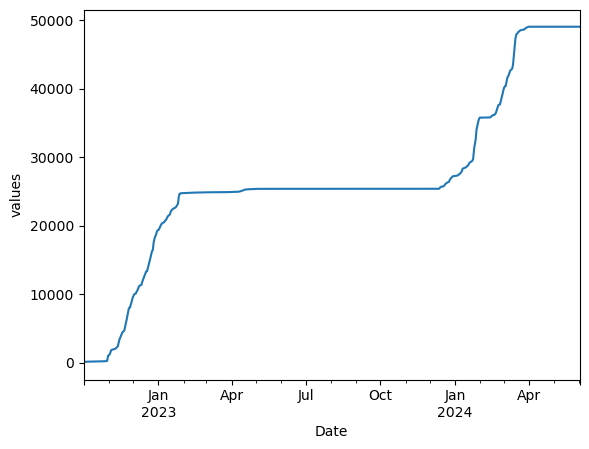

In [10]:
df_c2.plot(ylabel="values")

In [11]:
df_c2.describe()

count    14640.000000
mean     26498.546858
std      12124.892457
min          5.958333
25%      24875.062500
50%      25382.000000
75%      27266.041667
max      49036.000000
Name: c2, dtype: float64

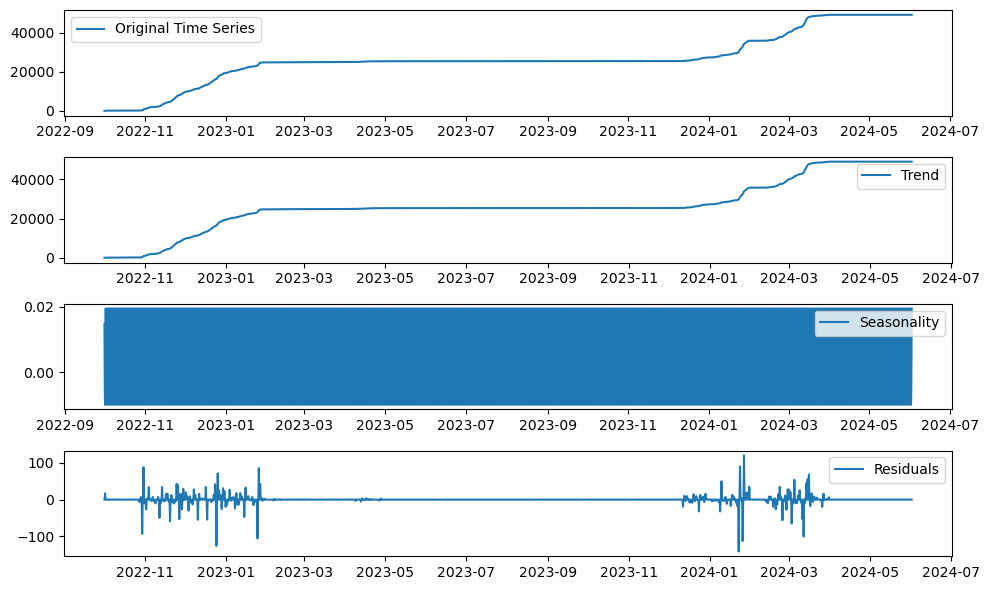

In [12]:
# Perform time series decomposition
decomposition = seasonal_decompose(df_c2, model='additive')

# Plot the original time series
plt.figure(figsize=(10, 6))
plt.subplot(4, 1, 1)
plt.plot(df_c2, label='Original Time Series')
plt.legend()

# Plot the trend component
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

# Plot the seasonal component
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend()

# Plot the residual component
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()


In [13]:
# Check for stationarity using the Augmented Dickey-Fuller test
result = adfuller(df_c2)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.2344977328197373
p-value: 0.6585824576298538


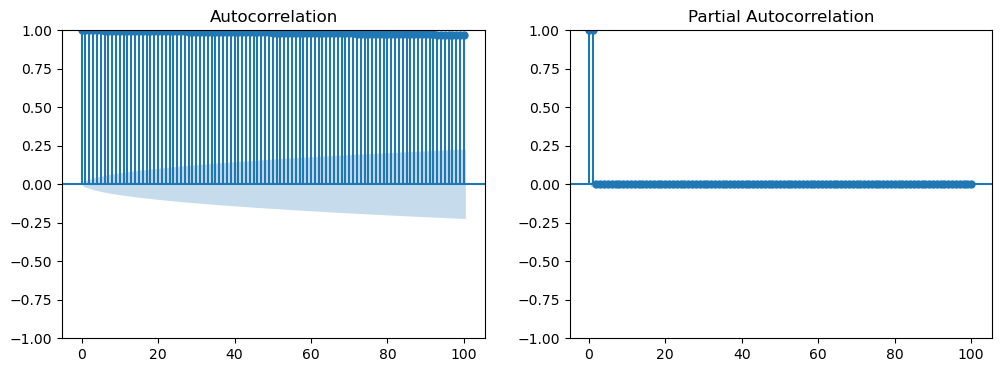

In [14]:
# Plot Autocorrelation and Partial Autocorrelation Functions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_c2, lags=100, ax=ax1)
plot_pacf(df_c2, lags=100, ax=ax2)
plt.show()

In [15]:
df_c2_diff=df_c2.diff(periods=1).dropna()

In [16]:
print(df_c2_diff)

Date
2022-10-01 02:00:00    5.958333
2022-10-01 03:00:00    5.958333
2022-10-01 04:00:00    5.958333
2022-10-01 05:00:00    5.958333
2022-10-01 06:00:00    5.958333
                         ...   
2024-06-01 20:00:00    0.000000
2024-06-01 21:00:00    0.000000
2024-06-01 22:00:00    0.000000
2024-06-01 23:00:00    0.000000
2024-06-02 00:00:00    0.000000
Freq: H, Name: c2, Length: 14639, dtype: float64


<Axes: xlabel='Date', ylabel='Diff Values'>

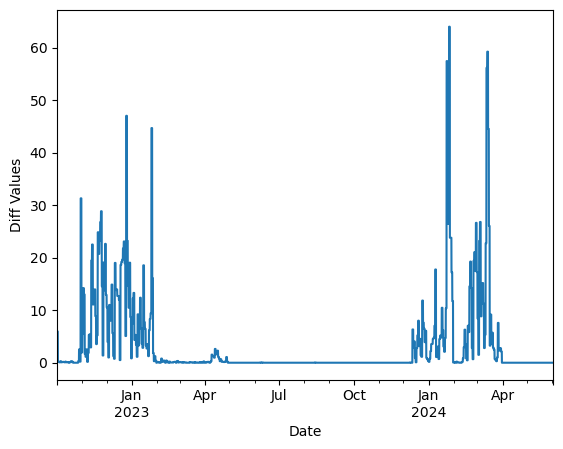

In [17]:
df_c2_diff.plot(ylabel="Diff Values")

In [18]:
df_c2_diff.describe()

count    14639.000000
mean         3.349275
std          8.015504
min          0.000000
25%          0.000000
50%          0.000000
75%          2.291667
max         63.958333
Name: c2, dtype: float64

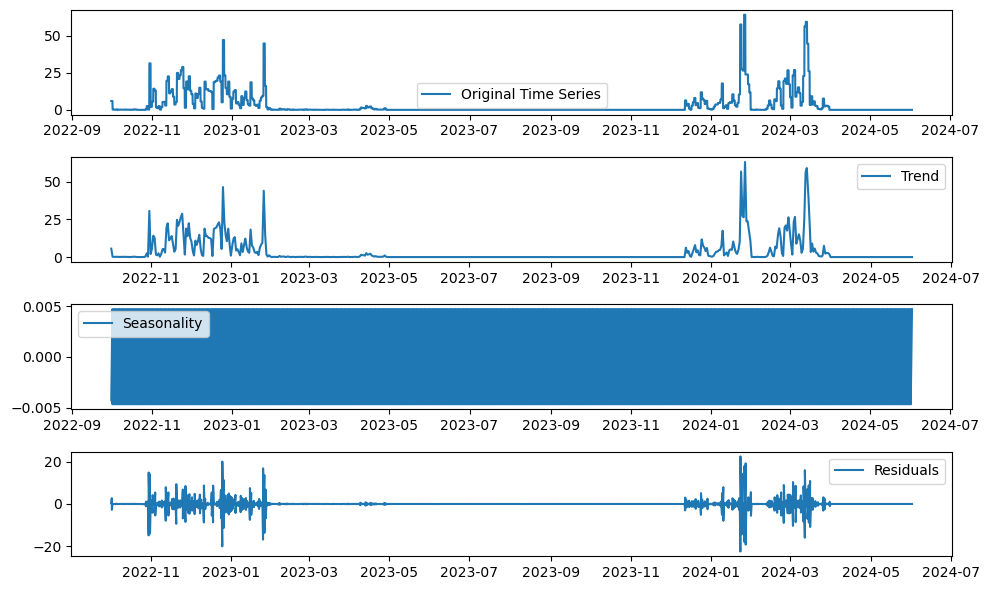

In [19]:
# Perform time series decomposition
decomposition = seasonal_decompose(df_c2_diff, model='additive')

# Plot the original time series
plt.figure(figsize=(10, 6))
plt.subplot(4, 1, 1)
plt.plot(df_c2_diff, label='Original Time Series')
plt.legend()

# Plot the trend component
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

# Plot the seasonal component
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend()

# Plot the residual component
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()


In [20]:
# Check for stationarity using the Augmented Dickey-Fuller test
result = adfuller(df_c2_diff)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -7.879561696722406
p-value: 4.7428492343225425e-12


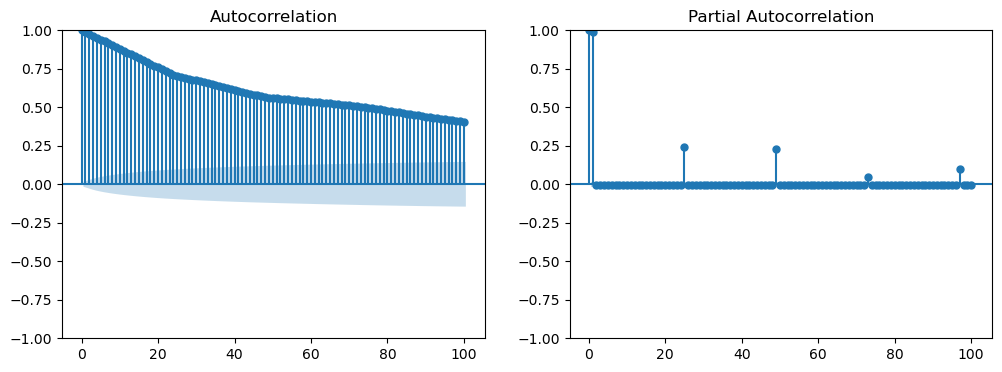

In [21]:
# Plot Autocorrelation and Partial Autocorrelation Functions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_c2_diff, lags=100, ax=ax1)
plot_pacf(df_c2_diff, lags=100, ax=ax2)
plt.show()

In [22]:
df_c2_diff_v=df_c2_diff.values

In [23]:
sequence_length = 100
evalue=200

In [27]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
ts_data_scaled = scaler.fit_transform(df_c2_diff_v.reshape(-1, 1))

# Define sequence length
sequence_length = 100

# Create sequences for training
X, y = [], []
for i in range(len(ts_data_scaled) - sequence_length):
    X.append(ts_data_scaled[i:i + sequence_length])
    y.append(ts_data_scaled[i + sequence_length])

X, y = np.array(X), np.array(y)

# Initial split into 75% training and 25% temporary
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, shuffle=False)

# Split the temporary set into 40% validation and 60% test
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.4, shuffle=False)

# Reshape the data for LSTM/GRU input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))

# Output shapes to verify
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")


X_train shape: (10904, 100, 1), y_train shape: (10904, 1)
X_test shape: (2181, 100, 1), y_test shape: (2181, 1)
X_val shape: (1454, 100, 1), y_val shape: (1454, 1)


In [28]:
# Define Early Stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Build the RNN model
model_rnn_c2 = Sequential()
model_rnn_c2.add(SimpleRNN(100, activation='relu', input_shape=(sequence_length,1)))
model_rnn_c2.add(Dense(1))
model_rnn_c2.compile(optimizer='adam', loss='mse')
print("RNN\n")
model_rnn_c2.summary()
print("\n")

# Train the model with early stopping
history_model_rnn_c2 = model_rnn_c2.fit(X_train, y_train, 
                                        epochs=evalue, 
                                        batch_size=32,
                                        validation_data=(X_val, y_val), 
                                        verbose=2,
                                        callbacks=[early_stopping])


RNN

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 10301 (40.24 KB)
Trainable params: 10301 (40.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
341/341 - 9s - loss: 8.0533e-04 - val_loss: 5.0409e-07 - 9s/epoch - 28ms/step
Epoch 2/200
341/341 - 6s - loss: 3.1930e-04 - val_loss: 6.4523e-07 - 6s/epoch - 19ms/step
Epoch 3/200
341/341 - 6s - loss: 3.0724e-04 - val_loss: 2.1199e-06 - 6s/epoch - 17ms/step
Epoch 4/200
341/341 - 6s - loss: 2.8392e-04 - val_loss: 1.7699e-06 - 6s/epoch - 17ms/step
Epoch 5/200
341/341 - 6s - loss: 2.8010e-04 - val

69/69 [==============================] - 1s 8ms/step


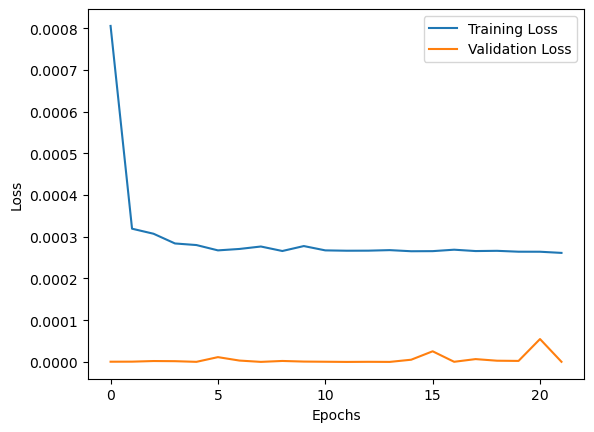

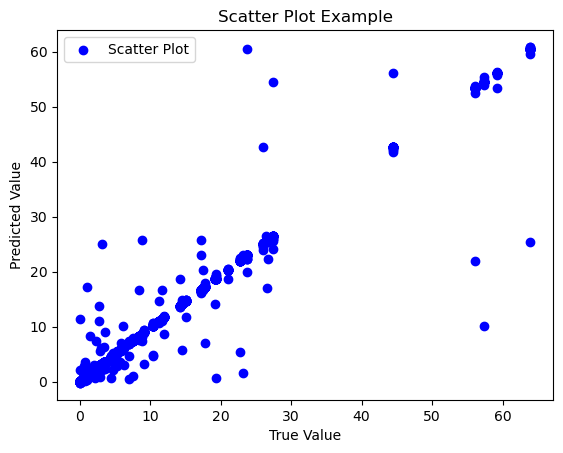

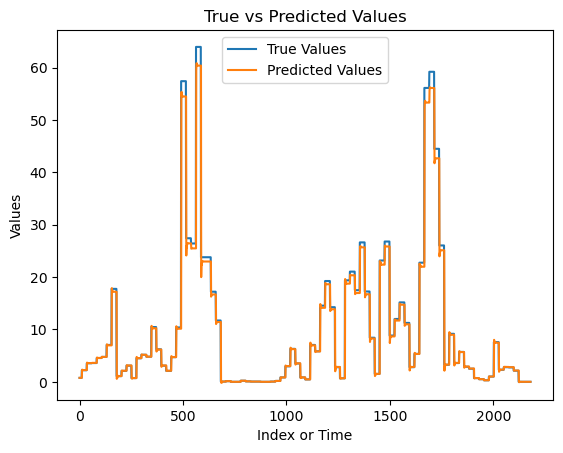

Performance on Different Metrics
RMSE: 2.3602515567799265
MAE: 0.5885026789282561
MSE: 5.570787411282066
R2: 0.9706630075537046


In [29]:
# Make predictions on the test set
y_pred_scaled = model_rnn_c2.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE, MAE, MSE, and R2
rmse = sqrt(mean_squared_error(y_test_inv, y_pred))
mae = mean_absolute_error(y_test_inv, y_pred)
mse = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

# Storing the values
p_rnn_c2 = {}
p_rnn_c2['RMSE'] = rmse
p_rnn_c2['MAE'] = mae
p_rnn_c2['MSE'] = mse
p_rnn_c2['R2'] = r2

# Plotting the training and validation loss over epochs
plt.plot(history_model_rnn_c2.history['loss'], label='Training Loss')
plt.plot(history_model_rnn_c2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# True Value vs Predicted Value
plt.scatter(y_test_inv, y_pred, marker='o', color='blue', label='Scatter Plot')
# Add labels and title
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot Example')
# Add a legend if needed
plt.legend()
# Display the plot
plt.show()

# Line plot for true values (y_test_inv)
plt.plot(range(len(y_test_inv)), y_test_inv, label='True Values')
# Line plot for predicted values (y_pred)
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values')
# Adding labels and title
plt.xlabel('Index or Time')
plt.ylabel('Values')
plt.title('True vs Predicted Values')
plt.legend()
# Show the plot
plt.show()

print("Performance on Different Metrics")
# Printing performance metrics of the model
for key, value in p_rnn_c2.items():
    print(f'{key}: {value}')

In [30]:
# Define Early Stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Build the LSTM model
model_lstm_c2 = Sequential()
model_lstm_c2.add(LSTM(100, activation='relu', input_shape=(sequence_length,1)))
model_lstm_c2.add(Dense(1))
model_lstm_c2.compile(optimizer='adam', loss='mse')
print("LSTM\n")
model_lstm_c2.summary()
print("\n")

# Train the model with early stopping
history_model_lstm_c2 = model_lstm_c2.fit(X_train, y_train, 
                                          epochs=evalue, 
                                          batch_size=32,
                                          validation_data=(X_val, y_val), 
                                          verbose=2,
                                          callbacks=[early_stopping])


LSTM

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
341/341 - 27s - loss: 8.9020e-04 - val_loss: 1.9852e-05 - 27s/epoch - 79ms/step
Epoch 2/200
341/341 - 24s - loss: 4.7556e-04 - val_loss: 2.7889e-04 - 24s/epoch - 72ms/step
Epoch 3/200
341/341 - 23s - loss: 3.8061e-04 - val_loss: 2.2895e-06 - 23s/epoch - 67ms/step
Epoch 4/200
341/341 - 23s - loss: 3.4923e-04 - val_loss: 5.5500e-05 - 23s/epoch - 67ms/step
Epoch 5/200
341/341 - 25s - loss: 3.

69/69 [==============================] - 2s 20ms/step


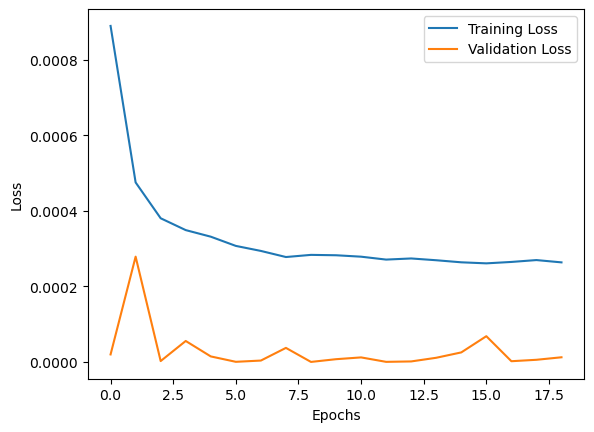

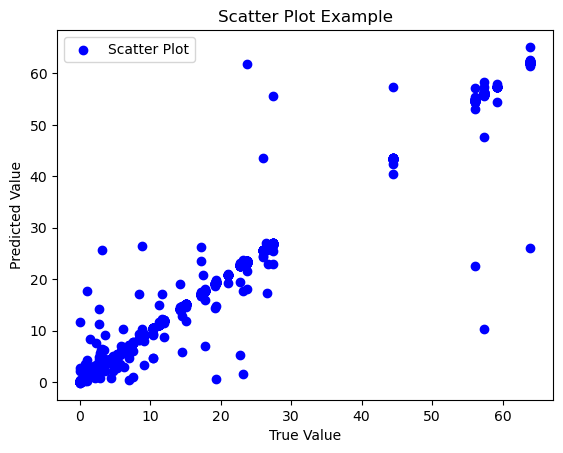

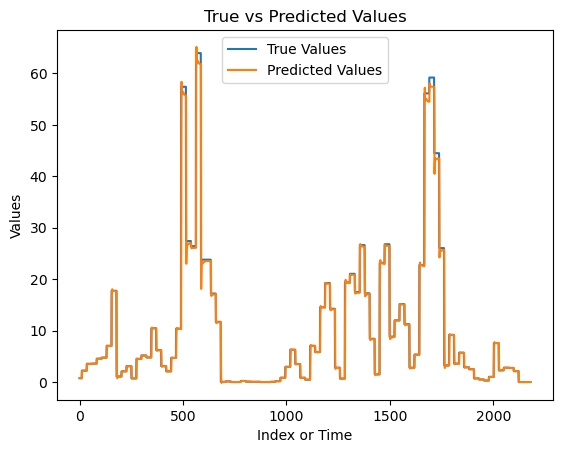

Performance on Different Metrics
RMSE: 2.3180291308072913
MAE: 0.43456377390927126
MSE: 5.373259051271207
R2: 0.9717032353667121


In [31]:
# Make predictions on the test set
y_pred_scaled = model_lstm_c2.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE, MAE, MSE, and R2
rmse = sqrt(mean_squared_error(y_test_inv, y_pred))
mae = mean_absolute_error(y_test_inv, y_pred)
mse = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

# Storing the values
p_lstm_c2 = {}
p_lstm_c2['RMSE'] = rmse
p_lstm_c2['MAE'] = mae
p_lstm_c2['MSE'] = mse
p_lstm_c2['R2'] = r2

# Plotting the training and validation loss over epochs
plt.plot(history_model_lstm_c2.history['loss'], label='Training Loss')
plt.plot(history_model_lstm_c2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# True Value vs Predicted Value
plt.scatter(y_test_inv, y_pred, marker='o', color='blue', label='Scatter Plot')
# Add labels and title
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot Example')
# Add a legend if needed
plt.legend()
# Display the plot
plt.show()

# Line plot for true values (y_test_inv)
plt.plot(range(len(y_test_inv)), y_test_inv, label='True Values')
# Line plot for predicted values (y_pred)
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values')
# Adding labels and title
plt.xlabel('Index or Time')
plt.ylabel('Values')
plt.title('True vs Predicted Values')
plt.legend()
# Show the plot
plt.show()

print("Performance on Different Metrics")
# Printing performance metrics of the model
for key, value in p_lstm_c2.items():
    print(f'{key}: {value}')


In [32]:
# Define Early Stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Build the BiLSTM model
model_bilstm_c2 = Sequential()
model_bilstm_c2.add(Bidirectional(LSTM(100, activation='relu'), input_shape=(sequence_length,1)))
model_bilstm_c2.add(Dense(1))
model_bilstm_c2.compile(optimizer='adam', loss='mse')
print("BiLSTM\n")
model_bilstm_c2.summary()
print("\n")

# Train the model with early stopping
history_model_bilstm_c2 = model_bilstm_c2.fit(X_train, y_train, 
                                              epochs=evalue, 
                                              batch_size=32,
                                              validation_data=(X_val, y_val), 
                                              verbose=2,
                                              callbacks=[early_stopping])

BiLSTM

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 200)               81600     
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 81801 (319.54 KB)
Trainable params: 81801 (319.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
341/341 - 29s - loss: 0.0015 - val_loss: 1.6511e-04 - 29s/epoch - 84ms/step
Epoch 2/200
341/341 - 25s - loss: 5.8699e-04 - val_loss: 7.5208e-05 - 25s/epoch - 73ms/step
Epoch 3/200
341/341 - 24s - loss: 4.7294e-04 - val_loss: 1.8524e-05 - 24s/epoch - 70ms/step
Epoch 4/200
341/341 - 25s - loss: 4.2145e-04 - val_loss: 2.8016e

69/69 [==============================] - 2s 20ms/step


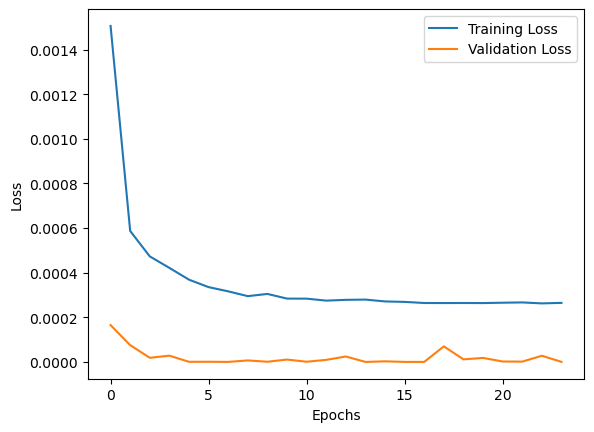

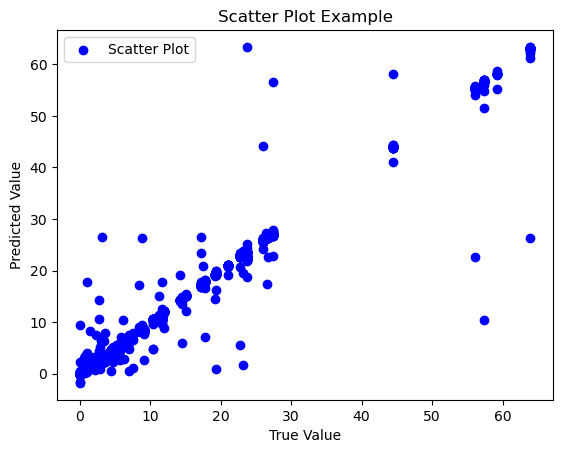

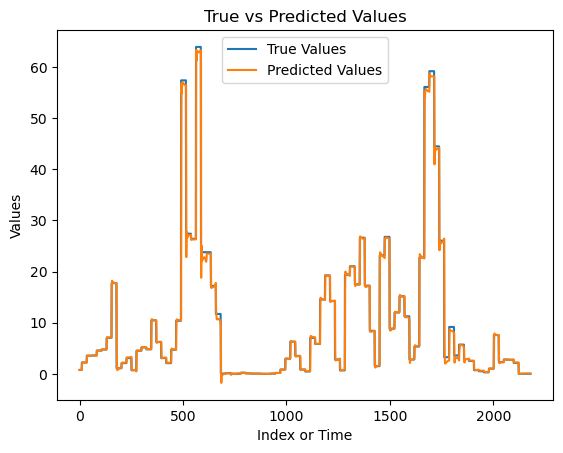

Performance on Different Metrics
RMSE: 2.312716048831207
MAE: 0.4517281082026734
MSE: 5.3486555225214305
R2: 0.9718328029634979


In [33]:
# Make predictions on the test set
y_pred_scaled = model_bilstm_c2.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE, MAE, MSE, and R2
rmse = sqrt(mean_squared_error(y_test_inv, y_pred))
mae = mean_absolute_error(y_test_inv, y_pred)
mse = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

# Storing the values
p_bilstm_c2 = {}
p_bilstm_c2['RMSE'] = rmse
p_bilstm_c2['MAE'] = mae
p_bilstm_c2['MSE'] = mse
p_bilstm_c2['R2'] = r2

# Plotting the training and validation loss over epochs
plt.plot(history_model_bilstm_c2.history['loss'], label='Training Loss')
plt.plot(history_model_bilstm_c2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# True Value vs Predicted Value
plt.scatter(y_test_inv, y_pred, marker='o', color='blue', label='Scatter Plot')
# Add labels and title
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot Example')
# Add a legend if needed
plt.legend()
# Display the plot
plt.show()

# Line plot for true values (y_test_inv)
plt.plot(range(len(y_test_inv)), y_test_inv, label='True Values')
# Line plot for predicted values (y_pred)
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values')
# Adding labels and title
plt.xlabel('Index or Time')
plt.ylabel('Values')
plt.title('True vs Predicted Values')
plt.legend()
# Show the plot
plt.show()

print("Performance on Different Metrics")
# Printing performance metrics of the model
for key, value in p_bilstm_c2.items():
    print(f'{key}: {value}')

In [34]:
# Define Early Stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Build the GRU model
model_gru_c2 = Sequential()
model_gru_c2.add(GRU(100, activation='relu', input_shape=(sequence_length, 1)))
model_gru_c2.add(Dense(1))
model_gru_c2.compile(optimizer='adam', loss='mse')
print("GRU\n")
model_gru_c2.summary()
print("\n")

# Train the model with early stopping
history_model_gru_c2 = model_gru_c2.fit(X_train, y_train, 
                                        epochs=evalue, 
                                        batch_size=32,
                                        validation_data=(X_val, y_val), 
                                        verbose=2,
                                        callbacks=[early_stopping])

GRU

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 100)               30900     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 31001 (121.10 KB)
Trainable params: 31001 (121.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
341/341 - 20s - loss: 6.6105e-04 - val_loss: 1.7854e-09 - 20s/epoch - 58ms/step
Epoch 2/200
341/341 - 16s - loss: 3.4105e-04 - val_loss: 3.6104e-06 - 16s/epoch - 48ms/step
Epoch 3/200
341/341 - 16s - loss: 3.0555e-04 - val_loss: 1.3480e-06 - 16s/epoch - 48ms/step
Epoch 4/200
341/341 - 16s - loss: 2.8301e-04 - val_loss: 7.8304e-06 - 16s/epoch - 48ms/step
Epoch 5/200
341/341 - 16s - loss: 2.7

69/69 [==============================] - 1s 14ms/step


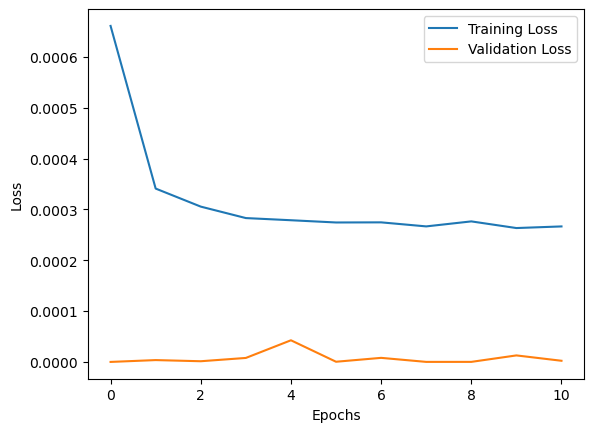

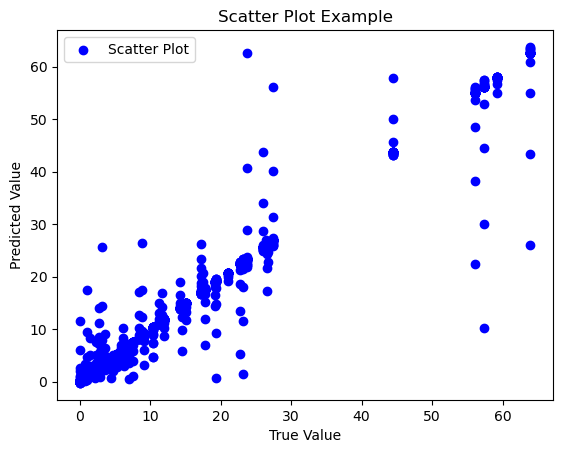

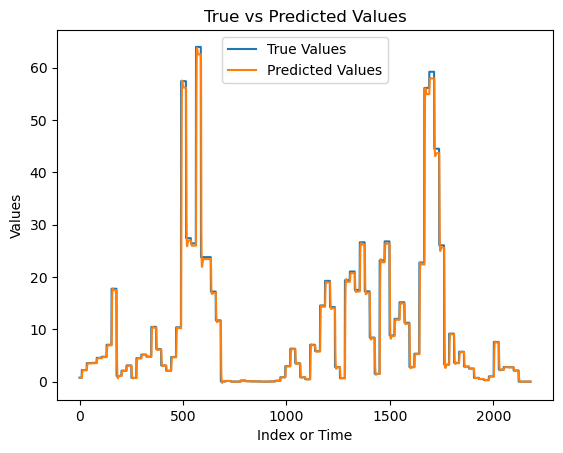

Performance on Different Metrics
RMSE: 2.623734382914109
MAE: 0.6095028016311144
MSE: 6.88398211208568
R2: 0.9637474352703378


In [35]:
# Make predictions on the test set
y_pred_scaled = model_gru_c2.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE, MAE, MSE, and R2
rmse = sqrt(mean_squared_error(y_test_inv, y_pred))
mae = mean_absolute_error(y_test_inv, y_pred)
mse = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

# Storing the values
p_gru_c2 = {}
p_gru_c2['RMSE'] = rmse
p_gru_c2['MAE'] = mae
p_gru_c2['MSE'] = mse
p_gru_c2['R2'] = r2

# Plotting the training and validation loss over epochs
plt.plot(history_model_gru_c2.history['loss'], label='Training Loss')
plt.plot(history_model_gru_c2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# True Value vs Predicted Value
plt.scatter(y_test_inv, y_pred, marker='o', color='blue', label='Scatter Plot')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot Example')
plt.legend()
plt.show()

# Line plot for true values (y_test_inv)
plt.plot(range(len(y_test_inv)), y_test_inv, label='True Values')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values')
plt.xlabel('Index or Time')
plt.ylabel('Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

# Printing performance metrics of the model
print("Performance on Different Metrics")
for key, value in p_gru_c2.items():
    print(f'{key}: {value}')

In [36]:
# Define Early Stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Build the hybrid RNN-LSTM model
model_hybrid_rnn_lstm_c2 = Sequential()
model_hybrid_rnn_lstm_c2.add(SimpleRNN(100, activation='relu', input_shape=(sequence_length, 1), return_sequences=True))
model_hybrid_rnn_lstm_c2.add(LSTM(100, activation='relu'))
model_hybrid_rnn_lstm_c2.add(Dense(1))
model_hybrid_rnn_lstm_c2.compile(optimizer='adam', loss='mse')

print("Hybrid RNN-LSTM\n")
model_hybrid_rnn_lstm_c2.summary()
print("\n")

# Train the model with early stopping
history_model_hybrid_rnn_lstm_c2 = model_hybrid_rnn_lstm_c2.fit(X_train, y_train, 
                                                                epochs=evalue, 
                                                                batch_size=32,
                                                                validation_data=(X_val, y_val), 
                                                                verbose=2,
                                                                callbacks=[early_stopping])

Hybrid RNN-LSTM

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 100, 100)          10200     
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 90701 (354.30 KB)
Trainable params: 90701 (354.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
341/341 - 29s - loss: 6.7189e-04 - val_loss: 1.2467e-05 - 29s/epoch - 86ms/step
Epoch 2/200
341/341 - 28s - loss: 3.7312e-04 - val_loss: 9.1124e-08 - 28s/epoch - 83ms/step
Epoch 3/200
341/341 - 28s - loss: 3.1759e-04 - val_loss: 5.4539e-07 - 28s/epo

69/69 [==============================] - 2s 23ms/step


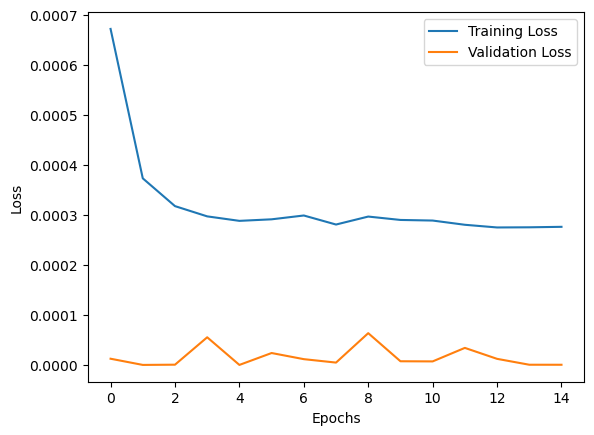

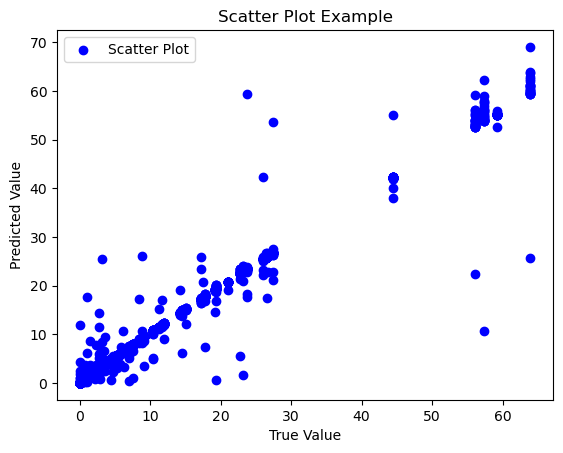

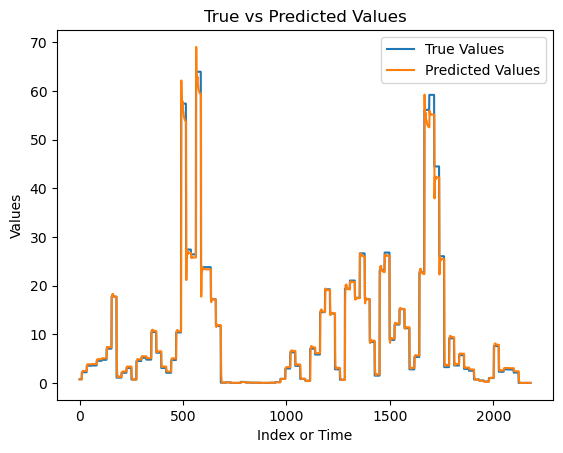

Performance on Different Metrics
RMSE: 2.374376446530132
MAE: 0.6403052551310573
MSE: 5.637663509837057
R2: 0.9703108233015876


In [37]:
# Make predictions on the test set
y_pred_scaled = model_hybrid_rnn_lstm_c2.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE, MAE, MSE, and R2
rmse = sqrt(mean_squared_error(y_test_inv, y_pred))
mae = mean_absolute_error(y_test_inv, y_pred)
mse = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

# Storing the values
p_hybrid_rnn_lstm_c2 = {}
p_hybrid_rnn_lstm_c2['RMSE'] = rmse
p_hybrid_rnn_lstm_c2['MAE'] = mae
p_hybrid_rnn_lstm_c2['MSE'] = mse
p_hybrid_rnn_lstm_c2['R2'] = r2

# Plotting the training and validation loss over epochs
plt.plot(history_model_hybrid_rnn_lstm_c2.history['loss'], label='Training Loss')
plt.plot(history_model_hybrid_rnn_lstm_c2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# True Value vs Predicted Value
plt.scatter(y_test_inv, y_pred, marker='o', color='blue', label='Scatter Plot')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot Example')
plt.legend()
plt.show()

# Line plot for true values (y_test_inv)
plt.plot(range(len(y_test_inv)), y_test_inv, label='True Values')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values')
plt.xlabel('Index or Time')
plt.ylabel('Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

# Printing performance metrics of the model
print("Performance on Different Metrics")
for key, value in p_hybrid_rnn_lstm_c2.items():
    print(f'{key}: {value}')

In [38]:
# Define Early Stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Build the hybrid RNN-BiLSTM model
model_hybrid_rnn_bilstm_c2 = Sequential()
model_hybrid_rnn_bilstm_c2.add(SimpleRNN(100, activation='relu', input_shape=(sequence_length, 1), return_sequences=True))
model_hybrid_rnn_bilstm_c2.add(Bidirectional(LSTM(100, activation='relu')))
model_hybrid_rnn_bilstm_c2.add(Dense(1))
model_hybrid_rnn_bilstm_c2.compile(optimizer='adam', loss='mse')

print("Hybrid RNN-BiLSTM\n")
model_hybrid_rnn_bilstm_c2.summary()
print("\n")

# Train the model with early stopping
history_model_hybrid_rnn_bilstm_c2 = model_hybrid_rnn_bilstm_c2.fit(X_train, y_train, 
                                                                    epochs=evalue, 
                                                                    batch_size=32,
                                                                    validation_data=(X_val, y_val), 
                                                                    verbose=2,
                                                                    callbacks=[early_stopping])


Hybrid RNN-BiLSTM

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 100, 100)          10200     
                                                                 
 bidirectional_1 (Bidirecti  (None, 200)               160800    
 onal)                                                           
                                                                 
 dense_5 (Dense)             (None, 1)                 201       
                                                                 
Total params: 171201 (668.75 KB)
Trainable params: 171201 (668.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
341/341 - 38s - loss: 7.4951e-04 - val_loss: 2.6191e-07 - 38s/epoch - 112ms/step
Epoch 2/200
341/341 - 35s - loss: 4.1313e-04 - val_loss: 4.4377e-06 - 35s/epoch - 102ms/step
Epoch

69/69 [==============================] - 2s 25ms/step


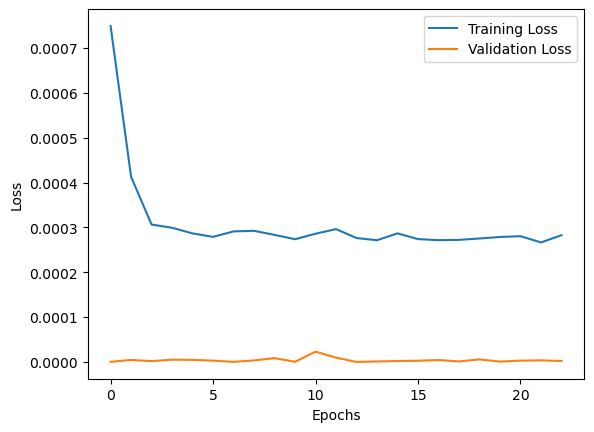

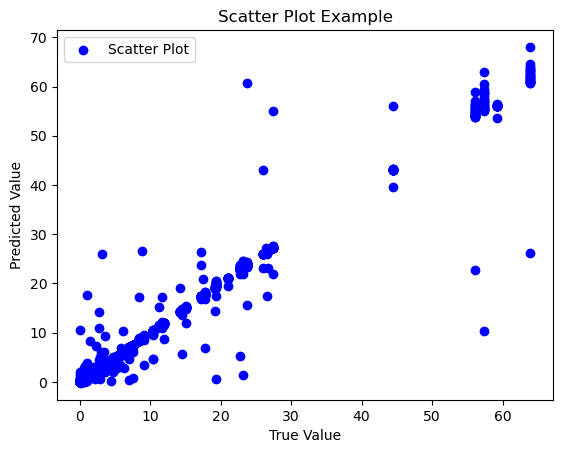

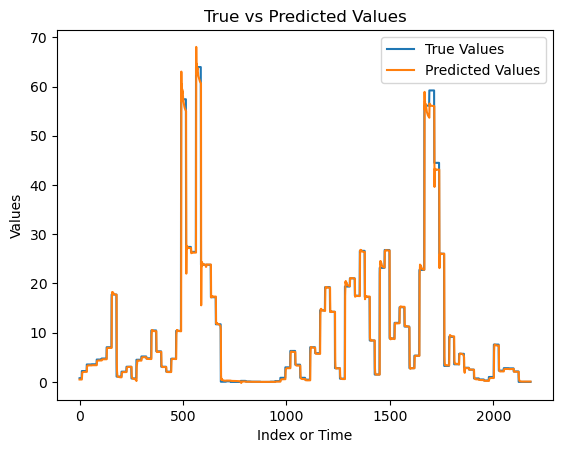

Performance on Different Metrics
RMSE: 2.31728349325235
MAE: 0.4948602121985643
MSE: 5.369802788099813
R2: 0.9717214368091772


In [39]:
# Make predictions on the test set
y_pred_scaled = model_hybrid_rnn_bilstm_c2.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE, MAE, MSE, and R2
rmse = sqrt(mean_squared_error(y_test_inv, y_pred))
mae = mean_absolute_error(y_test_inv, y_pred)
mse = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

# Storing the values
p_hybrid_rnn_bilstm_c2 = {}
p_hybrid_rnn_bilstm_c2['RMSE'] = rmse
p_hybrid_rnn_bilstm_c2['MAE'] = mae
p_hybrid_rnn_bilstm_c2['MSE'] = mse
p_hybrid_rnn_bilstm_c2['R2'] = r2

# Plotting the training and validation loss over epochs
plt.plot(history_model_hybrid_rnn_bilstm_c2.history['loss'], label='Training Loss')
plt.plot(history_model_hybrid_rnn_bilstm_c2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# True Value vs Predicted Value
plt.scatter(y_test_inv, y_pred, marker='o', color='blue', label='Scatter Plot')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot Example')
plt.legend()
plt.show()

# Line plot for true values (y_test_inv)
plt.plot(range(len(y_test_inv)), y_test_inv, label='True Values')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values')
plt.xlabel('Index or Time')
plt.ylabel('Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

# Printing performance metrics of the model
print("Performance on Different Metrics")
for key, value in p_hybrid_rnn_bilstm_c2.items():
    print(f'{key}: {value}')

In [40]:
# Define Early Stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Build the hybrid RNN-GRU model
model_hybrid_rnn_gru_c2 = Sequential()
model_hybrid_rnn_gru_c2.add(SimpleRNN(100, activation='relu', input_shape=(sequence_length, 1), return_sequences=True))
model_hybrid_rnn_gru_c2.add(GRU(100, activation='relu'))
model_hybrid_rnn_gru_c2.add(Dense(1))
model_hybrid_rnn_gru_c2.compile(optimizer='adam', loss='mse')

print("Hybrid RNN-GRU\n")
model_hybrid_rnn_gru_c2.summary()
print("\n")

# Train the model with early stopping
history_model_hybrid_rnn_gru_c2 = model_hybrid_rnn_gru_c2.fit(X_train, y_train, 
                                                              epochs=evalue, 
                                                              batch_size=32,
                                                              validation_data=(X_val, y_val), 
                                                              verbose=2,
                                                              callbacks=[early_stopping])

Hybrid RNN-GRU

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 100, 100)          10200     
                                                                 
 gru_1 (GRU)                 (None, 100)               60600     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 70901 (276.96 KB)
Trainable params: 70901 (276.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
341/341 - 24s - loss: 5.3734e-04 - val_loss: 6.1411e-06 - 24s/epoch - 72ms/step
Epoch 2/200
341/341 - 22s - loss: 3.2135e-04 - val_loss: 2.0312e-07 - 22s/epoch - 66ms/step
Epoch 3/200
341/341 - 23s - loss: 3.0460e-04 - val_loss: 7.9533e-07 - 23s/epoc

69/69 [==============================] - 2s 20ms/step


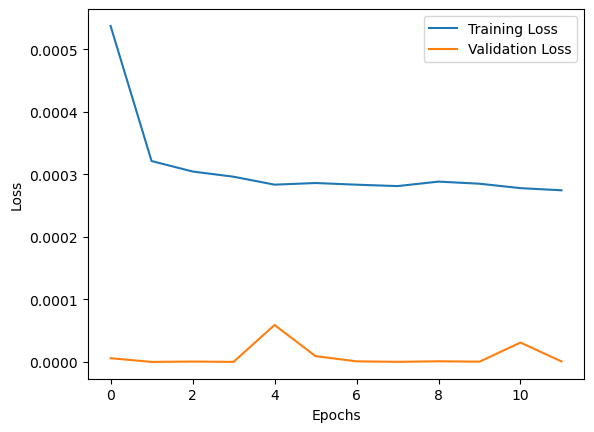

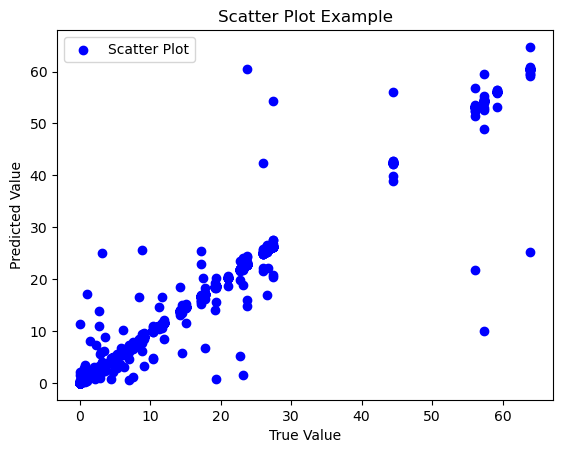

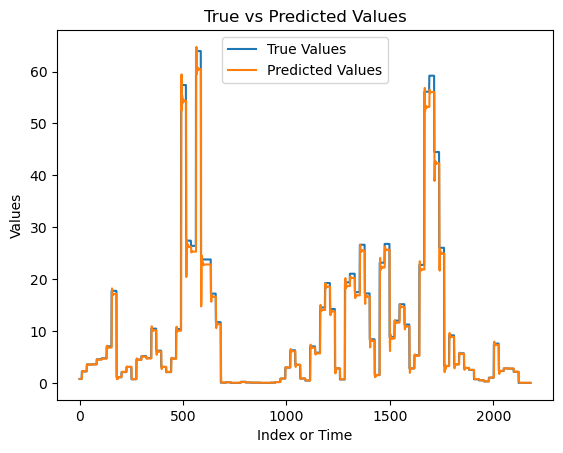

Performance on Different Metrics
RMSE: 2.416711247689862
MAE: 0.6711075721429094
MSE: 5.840493254710689
R2: 0.9692426772292404


In [41]:
# Make predictions on the test set
y_pred_scaled = model_hybrid_rnn_gru_c2.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE, MAE, MSE, and R2
rmse = sqrt(mean_squared_error(y_test_inv, y_pred))
mae = mean_absolute_error(y_test_inv, y_pred)
mse = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

# Storing the values
p_hybrid_rnn_gru_c2 = {}
p_hybrid_rnn_gru_c2['RMSE'] = rmse
p_hybrid_rnn_gru_c2['MAE'] = mae
p_hybrid_rnn_gru_c2['MSE'] = mse
p_hybrid_rnn_gru_c2['R2'] = r2

# Plotting the training and validation loss over epochs
plt.plot(history_model_hybrid_rnn_gru_c2.history['loss'], label='Training Loss')
plt.plot(history_model_hybrid_rnn_gru_c2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# True Value vs Predicted Value
plt.scatter(y_test_inv, y_pred, marker='o', color='blue', label='Scatter Plot')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot Example')
plt.legend()
plt.show()

# Line plot for true values (y_test_inv)
plt.plot(range(len(y_test_inv)), y_test_inv, label='True Values')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values')
plt.xlabel('Index or Time')
plt.ylabel('Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

# Printing performance metrics of the model
print("Performance on Different Metrics")
for key, value in p_hybrid_rnn_gru_c2.items():
    print(f'{key}: {value}')

In [42]:
# Define Early Stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Build the hybrid LSTM-BiLSTM model
model_hybrid_lstm_bilstm_c2 = Sequential()
model_hybrid_lstm_bilstm_c2.add(LSTM(100, activation='relu', input_shape=(sequence_length, 1), return_sequences=True))
model_hybrid_lstm_bilstm_c2.add(Bidirectional(LSTM(100, activation='relu')))
model_hybrid_lstm_bilstm_c2.add(Dense(1))
model_hybrid_lstm_bilstm_c2.compile(optimizer='adam', loss='mse')

print("Hybrid LSTM-BiLSTM\n")
model_hybrid_lstm_bilstm_c2.summary()
print("\n")

# Train the model with early stopping
history_model_hybrid_lstm_bilstm_c2 = model_hybrid_lstm_bilstm_c2.fit(X_train, y_train, 
                                                                      epochs=evalue, 
                                                                      batch_size=32,
                                                                      validation_data=(X_val, y_val), 
                                                                      verbose=2,
                                                                      callbacks=[early_stopping])

Hybrid LSTM-BiLSTM

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 100)          40800     
                                                                 
 bidirectional_2 (Bidirecti  (None, 200)               160800    
 onal)                                                           
                                                                 
 dense_7 (Dense)             (None, 1)                 201       
                                                                 
Total params: 201801 (788.29 KB)
Trainable params: 201801 (788.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
341/341 - 50s - loss: 0.0013 - val_loss: 9.5426e-05 - 50s/epoch - 148ms/step
Epoch 2/200
341/341 - 47s - loss: 6.1741e-04 - val_loss: 6.2524e-08 - 47s/epoch - 139ms/step
Epoch 3/

69/69 [==============================] - 3s 35ms/step


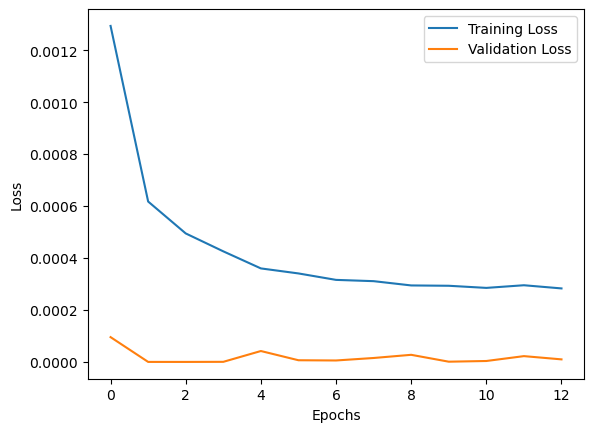

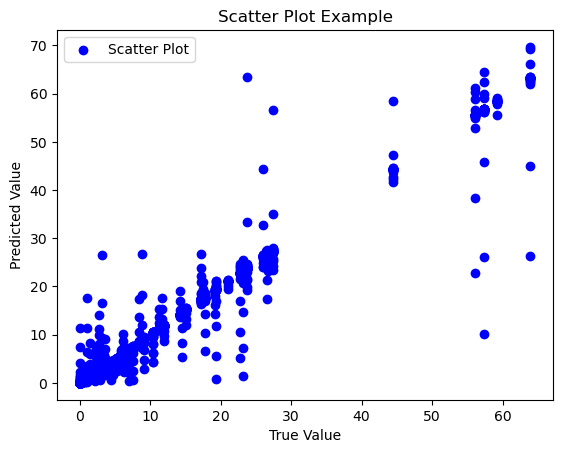

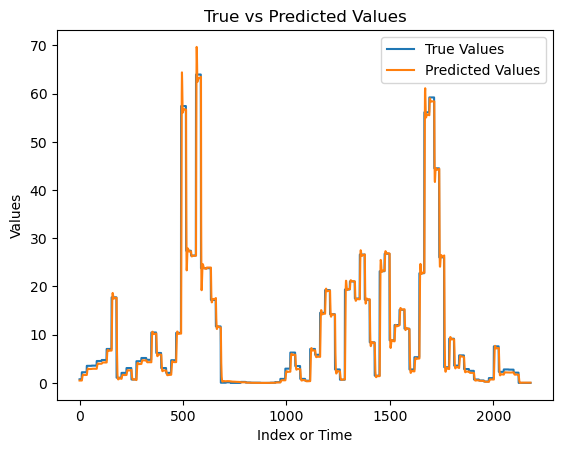

Performance on Different Metrics
RMSE: 2.7100367917467785
MAE: 0.7743562836731094
MSE: 7.344299412621173
R2: 0.9613233030657307


In [43]:
# Make predictions on the test set
y_pred_scaled = model_hybrid_lstm_bilstm_c2.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE, MAE, MSE, and R2
rmse = sqrt(mean_squared_error(y_test_inv, y_pred))
mae = mean_absolute_error(y_test_inv, y_pred)
mse = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

# Storing the values
p_hybrid_lstm_bilstm_c2 = {}
p_hybrid_lstm_bilstm_c2['RMSE'] = rmse
p_hybrid_lstm_bilstm_c2['MAE'] = mae
p_hybrid_lstm_bilstm_c2['MSE'] = mse
p_hybrid_lstm_bilstm_c2['R2'] = r2

# Plotting the training and validation loss over epochs
plt.plot(history_model_hybrid_lstm_bilstm_c2.history['loss'], label='Training Loss')
plt.plot(history_model_hybrid_lstm_bilstm_c2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# True Value vs Predicted Value
plt.scatter(y_test_inv, y_pred, marker='o', color='blue', label='Scatter Plot')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot Example')
plt.legend()
plt.show()

# Line plot for true values (y_test_inv)
plt.plot(range(len(y_test_inv)), y_test_inv, label='True Values')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values')
plt.xlabel('Index or Time')
plt.ylabel('Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

# Printing performance metrics of the model
print("Performance on Different Metrics")
for key, value in p_hybrid_lstm_bilstm_c2.items():
    print(f'{key}: {value}')

In [44]:
# Define Early Stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

#Build the hybrid LSTM-GRU model
model_hybrid_lstm_gru_c2 = Sequential()
model_hybrid_lstm_gru_c2.add(LSTM(100, activation='relu', input_shape=(sequence_length, 1), return_sequences=True))
model_hybrid_lstm_gru_c2.add(GRU(100, activation='relu'))
model_hybrid_lstm_gru_c2.add(Dense(1))
model_hybrid_lstm_gru_c2.compile(optimizer='adam', loss='mse')

print("Hybrid LSTM-GRU\n")
model_hybrid_lstm_gru_c2.summary()
print("\n")

# Train the model with early stopping
history_model_hybrid_lstm_gru_c2 = model_hybrid_lstm_gru_c2.fit(X_train, y_train, 
                                                                epochs=evalue, 
                                                                batch_size=32,
                                                                validation_data=(X_val, y_val), 
                                                                verbose=2,
                                                                callbacks=[early_stopping])

Hybrid LSTM-GRU

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 100)          40800     
                                                                 
 gru_2 (GRU)                 (None, 100)               60600     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 101501 (396.49 KB)
Trainable params: 101501 (396.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
341/341 - 37s - loss: 9.4518e-04 - val_loss: 3.5556e-05 - 37s/epoch - 108ms/step
Epoch 2/200
341/341 - 34s - loss: 4.8921e-04 - val_loss: 1.5902e-06 - 34s/epoch - 101ms/step
Epoch 3/200
341/341 - 34s - loss: 3.6528e-04 - val_loss: 3.1920e-05 - 34s

69/69 [==============================] - 2s 30ms/step


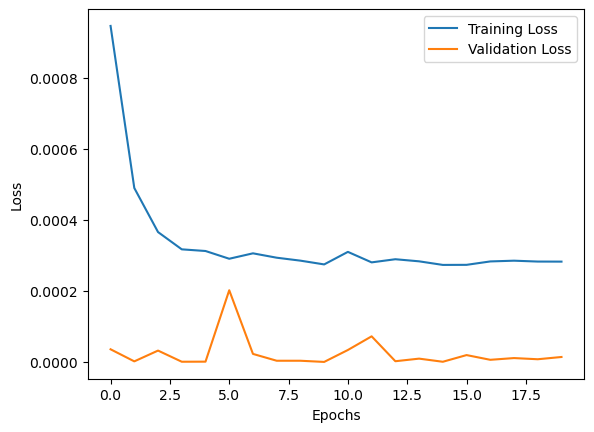

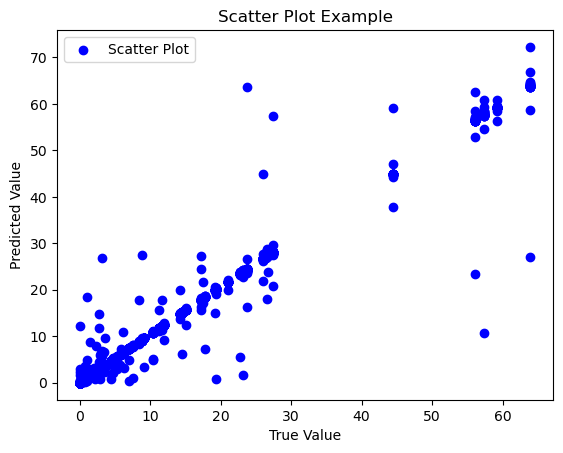

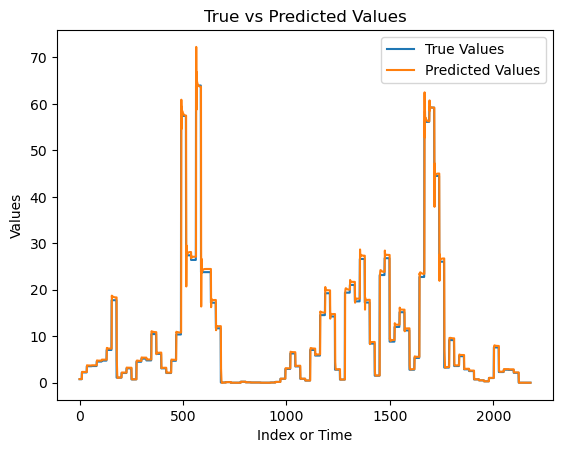

Performance on Different Metrics
RMSE: 2.3600330188148306
MAE: 0.547383027976406
MSE: 5.569755849896243
R2: 0.9706684399829735


In [45]:
# Make predictions on the test set
y_pred_scaled = model_hybrid_lstm_gru_c2.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE, MAE, MSE, and R2
rmse = sqrt(mean_squared_error(y_test_inv, y_pred))
mae = mean_absolute_error(y_test_inv, y_pred)
mse = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

# Storing the values
p_hybrid_lstm_gru_c2 = {}
p_hybrid_lstm_gru_c2['RMSE'] = rmse
p_hybrid_lstm_gru_c2['MAE'] = mae
p_hybrid_lstm_gru_c2['MSE'] = mse
p_hybrid_lstm_gru_c2['R2'] = r2

# Plotting the training and validation loss over epochs
plt.plot(history_model_hybrid_lstm_gru_c2.history['loss'], label='Training Loss')
plt.plot(history_model_hybrid_lstm_gru_c2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# True Value vs Predicted Value
plt.scatter(y_test_inv, y_pred, marker='o', color='blue', label='Scatter Plot')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot Example')
plt.legend()
plt.show()

# Line plot for true values (y_test_inv)
plt.plot(range(len(y_test_inv)), y_test_inv, label='True Values')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values')
plt.xlabel('Index or Time')
plt.ylabel('Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

# Printing performance metrics of the model
print("Performance on Different Metrics")
for key, value in p_hybrid_lstm_gru_c2.items():
    print(f'{key}: {value}')

In [46]:
# Define Early Stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Build the hybrid BiLSTM-GRU model
model_hybrid_bilstm_gru_c2 = Sequential()
model_hybrid_bilstm_gru_c2.add(Bidirectional(LSTM(100, activation='relu', input_shape=(sequence_length, 1), return_sequences=True)))
model_hybrid_bilstm_gru_c2.add(GRU(100, activation='relu'))
model_hybrid_bilstm_gru_c2.add(Dense(1))
model_hybrid_bilstm_gru_c2.compile(optimizer='adam', loss='mse')

# Train the model with early stopping
history_model_hybrid_bilstm_gru_c2 = model_hybrid_bilstm_gru_c2.fit(X_train, y_train, 
                                                                    epochs=evalue, 
                                                                    batch_size=32,
                                                                    validation_data=(X_val, y_val), 
                                                                    verbose=2,
                                                                    callbacks=[early_stopping])

Epoch 1/200
341/341 - 48s - loss: 1.9224 - val_loss: 2.9538e-05 - 48s/epoch - 141ms/step
Epoch 2/200
341/341 - 44s - loss: 4.3492e-04 - val_loss: 8.0228e-06 - 44s/epoch - 130ms/step
Epoch 3/200
341/341 - 44s - loss: 3.8005e-04 - val_loss: 7.0899e-05 - 44s/epoch - 129ms/step
Epoch 4/200
341/341 - 44s - loss: 3.6227e-04 - val_loss: 1.8295e-06 - 44s/epoch - 129ms/step
Epoch 5/200
341/341 - 44s - loss: 3.6179e-04 - val_loss: 2.2483e-06 - 44s/epoch - 129ms/step
Epoch 6/200
341/341 - 44s - loss: 3.1232e-04 - val_loss: 6.3937e-07 - 44s/epoch - 130ms/step
Epoch 7/200
341/341 - 44s - loss: 3.0911e-04 - val_loss: 3.4337e-05 - 44s/epoch - 129ms/step
Epoch 8/200
341/341 - 44s - loss: 3.0954e-04 - val_loss: 3.1622e-05 - 44s/epoch - 129ms/step
Epoch 9/200
341/341 - 44s - loss: 2.9175e-04 - val_loss: 6.6095e-06 - 44s/epoch - 130ms/step
Epoch 10/200
341/341 - 44s - loss: 2.9248e-04 - val_loss: 4.8106e-05 - 44s/epoch - 129ms/step
Epoch 11/200
341/341 - 44s - loss: 2.9109e-04 - val_loss: 6.4137e-06 - 44

69/69 [==============================] - 3s 37ms/step


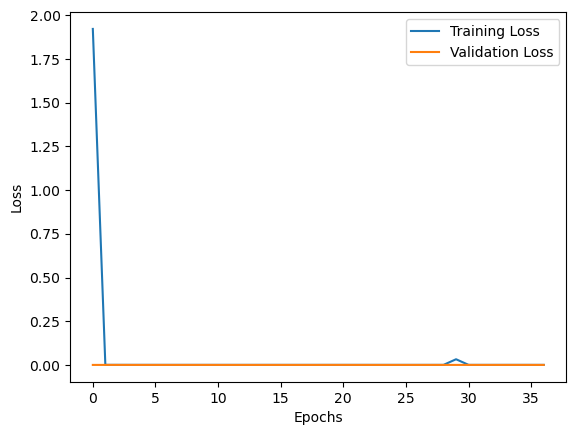

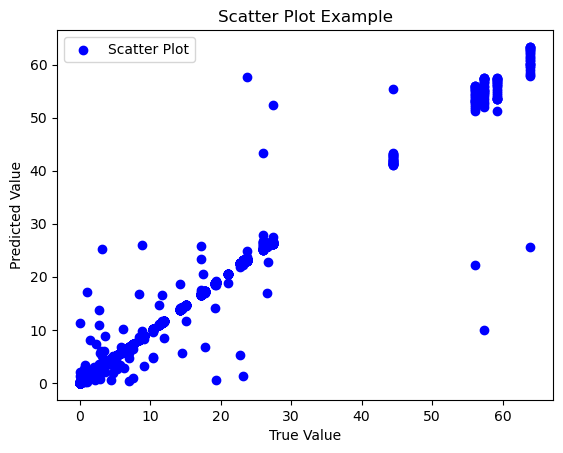

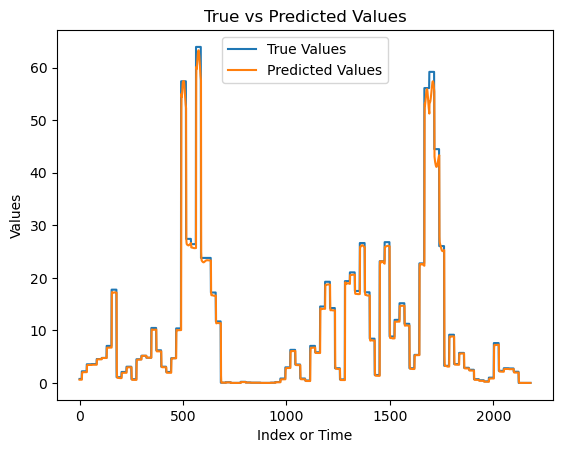

Performance on Different Metrics
RMSE: 2.33519593562587
MAE: 0.5992305720180734
MSE: 5.453140057763582
R2: 0.9712825644074644


In [47]:
# Make predictions on the test set
y_pred_scaled = model_hybrid_bilstm_gru_c2.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE, MAE, MSE, and R2
rmse = sqrt(mean_squared_error(y_test_inv, y_pred))
mae = mean_absolute_error(y_test_inv, y_pred)
mse = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

# Storing the values
p_hybrid_bilstm_gru_c2 = {}
p_hybrid_bilstm_gru_c2['RMSE'] = rmse
p_hybrid_bilstm_gru_c2['MAE'] = mae
p_hybrid_bilstm_gru_c2['MSE'] = mse
p_hybrid_bilstm_gru_c2['R2'] = r2

# Plotting the training and validation loss over epochs
plt.plot(history_model_hybrid_bilstm_gru_c2.history['loss'], label='Training Loss')
plt.plot(history_model_hybrid_bilstm_gru_c2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# True Value vs Predicted Value
plt.scatter(y_test_inv, y_pred, marker='o', color='blue', label='Scatter Plot')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot Example')
plt.legend()
plt.show()

# Line plot for true values (y_test_inv)
plt.plot(range(len(y_test_inv)), y_test_inv, label='True Values')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values')
plt.xlabel('Index or Time')
plt.ylabel('Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

# Printing performance metrics of the model
print("Performance on Different Metrics")
for key, value in p_hybrid_bilstm_gru_c2.items():
    print(f'{key}: {value}')

In [48]:
from prettytable import PrettyTable

# Create a PrettyTable object
p_table_c2 = PrettyTable()

# Define the table headers including MSE
p_table_c2.field_names = ["Model", "RMSE", "MAE", "MSE", "R2"]

# Add data to the table including MSE
p_table_c2.add_row(["RNN", p_rnn_c2['RMSE'], p_rnn_c2['MAE'], p_rnn_c2['MSE'], p_rnn_c2['R2']])
p_table_c2.add_row(["LSTM", p_lstm_c2['RMSE'], p_lstm_c2['MAE'], p_lstm_c2['MSE'], p_lstm_c2['R2']])
p_table_c2.add_row(["BiLSTM", p_bilstm_c2['RMSE'], p_bilstm_c2['MAE'], p_bilstm_c2['MSE'], p_bilstm_c2['R2']])
p_table_c2.add_row(["GRU", p_gru_c2['RMSE'], p_gru_c2['MAE'], p_gru_c2['MSE'], p_gru_c2['R2']])
p_table_c2.add_row(["Hybrid RNN-LSTM", p_hybrid_rnn_lstm_c2['RMSE'], p_hybrid_rnn_lstm_c2['MAE'], p_hybrid_rnn_lstm_c2['MSE'], p_hybrid_rnn_lstm_c2['R2']])
p_table_c2.add_row(["Hybrid RNN-BiLSTM", p_hybrid_rnn_bilstm_c2['RMSE'], p_hybrid_rnn_bilstm_c2['MAE'], p_hybrid_rnn_bilstm_c2['MSE'], p_hybrid_rnn_bilstm_c2['R2']])
p_table_c2.add_row(["Hybrid RNN-GRU", p_hybrid_rnn_gru_c2['RMSE'], p_hybrid_rnn_gru_c2['MAE'], p_hybrid_rnn_gru_c2['MSE'], p_hybrid_rnn_gru_c2['R2']])
p_table_c2.add_row(["Hybrid LSTM-BiLSTM", p_hybrid_lstm_bilstm_c2['RMSE'], p_hybrid_lstm_bilstm_c2['MAE'], p_hybrid_lstm_bilstm_c2['MSE'], p_hybrid_lstm_bilstm_c2['R2']])
p_table_c2.add_row(["Hybrid LSTM-GRU", p_hybrid_lstm_gru_c2['RMSE'], p_hybrid_lstm_gru_c2['MAE'], p_hybrid_lstm_gru_c2['MSE'], p_hybrid_lstm_gru_c2['R2']])
p_table_c2.add_row(["Hybrid BiLSTM-GRU", p_hybrid_bilstm_gru_c2['RMSE'], p_hybrid_bilstm_gru_c2['MAE'], p_hybrid_bilstm_gru_c2['MSE'], p_hybrid_bilstm_gru_c2['R2']])

# Set table properties (optional)
p_table_c2.align["Model"] = "l"  # Left-align the 'Model' column

# Print the table
print(p_table_c2)


+--------------------+--------------------+---------------------+--------------------+--------------------+
| Model              |        RMSE        |         MAE         |        MSE         |         R2         |
+--------------------+--------------------+---------------------+--------------------+--------------------+
| RNN                | 2.3602515567799265 |  0.5885026789282561 | 5.570787411282066  | 0.9706630075537046 |
| LSTM               | 2.3180291308072913 | 0.43456377390927126 | 5.373259051271207  | 0.9717032353667121 |
| BiLSTM             | 2.312716048831207  |  0.4517281082026734 | 5.3486555225214305 | 0.9718328029634979 |
| GRU                | 2.623734382914109  |  0.6095028016311144 |  6.88398211208568  | 0.9637474352703378 |
| Hybrid RNN-LSTM    | 2.374376446530132  |  0.6403052551310573 | 5.637663509837057  | 0.9703108233015876 |
| Hybrid RNN-BiLSTM  |  2.31728349325235  |  0.4948602121985643 | 5.369802788099813  | 0.9717214368091772 |
| Hybrid RNN-GRU     | 2.416

In [49]:
# Define performance metrics for each model
models_metrics = {
    "RNN": {"RMSE": p_rnn_c2['RMSE'], "MAE": p_rnn_c2['MAE'], "MSE": p_rnn_c2['MSE'], "R2": p_rnn_c2['R2']},
    "LSTM": {"RMSE": p_lstm_c2['RMSE'], "MAE": p_lstm_c2['MAE'], "MSE": p_lstm_c2['MSE'], "R2": p_lstm_c2['R2']},
    "BiLSTM": {"RMSE": p_bilstm_c2['RMSE'], "MAE": p_bilstm_c2['MAE'], "MSE": p_bilstm_c2['MSE'], "R2": p_bilstm_c2['R2']},
    "GRU": {"RMSE": p_gru_c2['RMSE'], "MAE": p_gru_c2['MAE'], "MSE": p_gru_c2['MSE'], "R2": p_gru_c2['R2']},
    "Hybrid RNN-LSTM c2": {"RMSE": p_hybrid_rnn_lstm_c2['RMSE'], "MAE": p_hybrid_rnn_lstm_c2['MAE'], "MSE": p_hybrid_rnn_lstm_c2['MSE'], "R2": p_hybrid_rnn_lstm_c2['R2']},
    "Hybrid RNN-BiLSTM c2": {"RMSE": p_hybrid_rnn_bilstm_c2['RMSE'], "MAE": p_hybrid_rnn_bilstm_c2['MAE'], "MSE": p_hybrid_rnn_bilstm_c2['MSE'], "R2": p_hybrid_rnn_bilstm_c2['R2']},
    "Hybrid RNN-GRU c2": {"RMSE": p_hybrid_rnn_gru_c2['RMSE'], "MAE": p_hybrid_rnn_gru_c2['MAE'], "MSE": p_hybrid_rnn_gru_c2['MSE'], "R2": p_hybrid_rnn_gru_c2['R2']},
    "Hybrid LSTM-BiLSTM c2": {"RMSE": p_hybrid_lstm_bilstm_c2['RMSE'], "MAE": p_hybrid_lstm_bilstm_c2['MAE'], "MSE": p_hybrid_lstm_bilstm_c2['MSE'], "R2": p_hybrid_lstm_bilstm_c2['R2']},
    "Hybrid LSTM-GRU c2": {"RMSE": p_hybrid_lstm_gru_c2['RMSE'], "MAE": p_hybrid_lstm_gru_c2['MAE'], "MSE": p_hybrid_lstm_gru_c2['MSE'], "R2": p_hybrid_lstm_gru_c2['R2']},
    "Hybrid BiLSTM-GRU c2": {"RMSE": p_hybrid_bilstm_gru_c2['RMSE'], "MAE": p_hybrid_bilstm_gru_c2['MAE'], "MSE": p_hybrid_bilstm_gru_c2['MSE'], "R2": p_hybrid_bilstm_gru_c2['R2']}
}

# Define the weights for each metric (lower RMSE, MAE, MSE; higher R2 is better)
weights = {"RMSE": -1, "MAE": -1, "MSE": -1, "R2": 1}

# Calculate the score for each model
model_scores = {}
for model, metrics in models_metrics.items():
    score = 0
    for metric, value in metrics.items():
        score += value * weights[metric]
    model_scores[model] = score

# Sort the models based on their score
sorted_models = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Assign Friedman ranking to each model based on their sorted order
friedman_ranking = {}
for i, (model, _) in enumerate(sorted_models):
    friedman_ranking[model] = i + 1

# Print Friedman ranking of each model
print("Friedman Ranking:")
for model, rank in friedman_ranking.items():
    print(f"{model}: {rank}")


Friedman Ranking:
BiLSTM: 1
LSTM: 2
Hybrid RNN-BiLSTM c2: 3
Hybrid BiLSTM-GRU c2: 4
Hybrid LSTM-GRU c2: 5
RNN: 6
Hybrid RNN-LSTM c2: 7
Hybrid RNN-GRU c2: 8
GRU: 9
Hybrid LSTM-BiLSTM c2: 10


In [50]:
# Create a DataFrame from the dictionary
df_metrics = pd.DataFrame(models_metrics).T

# Save DataFrame to a CSV file
df_metrics.to_csv('madhya_pradesh_c2_metrics_c2.csv')